In [2]:
import pandas as pd

# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
print(path)
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

https://drive.google.com/uc?export=download&id=1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m


In [3]:

import pandas as  pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec5ff77410>,
      dtype=object)

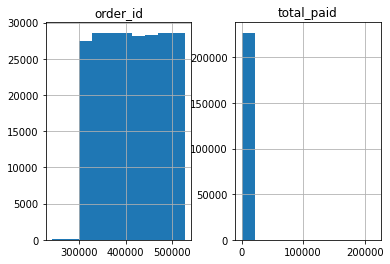

In [5]:
#plot the histogram of it's column values

df.hist()



In [6]:
#find me the missing values 

df.isnull().sum()



order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [7]:
#display the columns 

df.columns



Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')

In [8]:
#find me the average unit_price over id_order

df.groupby('order_id').mean()


,total_paid
order_id,
241319,44.99
241423,136.15
242832,15.76
243330,84.98
243784,157.86
...,...
527397,42.99
527398,42.99
527399,141.58


# Things to check: 

* [x] take a look at dates, do they match between orders and orderlines.
* [_] info between orders and orderlines: 
    * [x] do we have the same orders on both df?
    * [_] revenue? Check if prices between products and orderlines match.

In [9]:
orders.sample(5)

,order_id,created_date,total_paid,state,check_orders
76161,382813,2017-07-27 13:43:57,378.99,Shopping Basket,True
166676,484584,2018-01-07 22:22:47,51.26,Completed,True
1028,300522,2017-01-02 13:03:02,41.98,Shopping Basket,True
36814,339556,2017-03-27 10:16:04,88.98,Pending,True
20346,321821,2017-02-09 13:44:00,184.98,Completed,True


In [10]:
orderlines.sample(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
255662,1589157,501717,0,1,DLL0035,285.00,2018-01-30 07:53:25,285.00,True
79561,1273406,368208,0,1,SAM0116,107.99,2017-06-22 17:36:35,107.99,True
258173,1593647,502975,0,1,QNA0216,494.99,2018-01-31 22:11:14,494.99,True
153468,1422783,432360,0,1,APP0663,183.99,2017-11-22 21:44:34,183.99,True
108553,1325674,393174,0,1,APP1679,35.99,2017-08-27 22:50:03,35.99,True


In [11]:
orders.shape[0]

204691

In [12]:
temp = orderlines.copy()

In [13]:
orderlines.drop('check_orders',axis=1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74
...,...,...,...,...,...,...,...,...
293738,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99
293739,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58
293740,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98
293741,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99


In [14]:
# check if order id on orders exist on orderlines
(
pd.DataFrame(orders["order_id"])
    .rename(columns={"order_id":"id_order"})
    .assign(is_in_orderlines = lambda x: x["id_order"].isin(orderlines["id_order"]))
    .query("is_in_orderlines == True")
).shape[0]

204691

In [15]:
# check of order id on orderlines exists on orders
(
pd.DataFrame(orderlines["id_order"])
    .rename(columns={"id_order":"order_id"})
    .assign(is_in_orders = lambda x: x["order_id"].isin(orders["order_id"]))
    .query("is_in_orders")
).shape[0]

293743

In [16]:
orders.head()

,order_id,created_date,total_paid,state,check_orders
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True


In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
(
orderlines
    .groupby(["id_order"])
    .agg(total_price = ("total_price","sum"))
    .reset_index()
    .merge(orders, how="inner", left_on = "id_order", right_on = "order_id")
    .filter(["id_order","total_price","total_paid"])  
    .assign(diff = lambda x: x["total_paid"] - x["total_price"])
    .query("diff < 0.02 & diff > 0")
    .sum()
)

id_order      3885483363.00000
total_price     16073735.01000
total_paid      16073799.13000
diff                  64.12000
dtype: float64

In [28]:
(
orderlines
    .groupby(["id_order"])
    .agg(total_price = ("total_price","sum"))
    .reset_index()
    .merge(orders, how="inner", left_on = "id_order", right_on = "order_id")
    .filter(["id_order","total_price","total_paid"])
    .assign(diff = lambda x: x["total_paid"] - x["total_price"])
    # .query("diff < 0.02 & diff > 0")
    # .sum()
    .query("0.02 < diff < 30")
    .sample(10)

)



,id_order,total_price,total_paid,diff
200041,522266,1798.00000,1804.99000,6.99000
84011,391598,138.99000,145.98000,6.99000
77067,383851,44.96000,48.95000,3.99000
35496,338157,199.00000,203.99000,4.99000
58138,362702,89.99000,96.98000,6.99000
176372,495587,21.99000,26.98000,4.99000
76200,382857,188.99000,193.98000,4.99000
153394,469394,11.99000,16.98000,4.99000
4065,303918,14.99000,18.98000,3.99000
101898,411754,168.99000,172.98000,3.99000


In [29]:
#df_temp['diff'] =  df_temp["total_paid"] - df_temp["total_price"]

### Explanation how to use `DataFrame.merge()`

Create discounts columns on orderlines: 

In [ ]:
(
orderlines
    .filter(["id_order","sku","unit_price"])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .dropna()
)

,id_order,sku,unit_price,desc,max_price_orderlines,disc
37,299576,SAM0095,82.64000,SSD Hard Drive SATA 6 Gb / s 25-inch NAND tech...,86.99000,4.35000
174,299695,PAC1400,90.99000,Control on / off and power / consumer remote s...,96.99000,6.00000
331,299860,PAC1516,457.89000,NAS server with 8GB of RAM memory 2 Gigabit po...,484.99000,27.10000
357,299881,SAN0137,49.39000,SSD 120GB 25 inches,63.58000,14.19000
375,299902,IOT0018,23.74000,Magnetic car holder compatible with all models...,24.99000,1.25000
...,...,...,...,...,...,...
293598,527286,APP2490,1159.00000,New Apple iPhone 64GB Free Silver X,1159.00000,0.00000
293671,527342,APP2492,1329.00000,New Apple iPhone X 256GB Silver Free,1329.00000,0.00000
293696,527364,APP2491,1329.00000,New Apple iPhone X 256GB Free Space Gray,1329.00000,0.00000
293702,527367,REP0250,69.90000,Repair service including parts and labor for i...,69.90000,0.00000


In [ ]:
(
orderlines
    .filter(["id_order","sku","unit_price"])
    .merge(products.filter(["sku","desc","max_price_orderlines"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .dropna()
    .sample(20)
)

,id_order,sku,unit_price,desc,max_price_orderlines,disc
216405,475652,APP2490,1159.00000,New Apple iPhone 64GB Free Silver X,1159.00000,0.00000
48179,341501,PAC1927,279.00000,IMac used 20 inch Core 2 Duo 226GHz | 2GB RAM ...,285.60000,6.60000
41892,336126,SEV0025,59.99000,installation RAM HDD + SSD + on your iMac + Da...,474.96000,414.97000
277945,516779,APP2490,1159.00000,New Apple iPhone 64GB Free Silver X,1159.00000,0.00000
109565,394030,SEV0024,59.99000,installation RAM HDD + SSD + on your Mac mini ...,59.99000,0.00000
29126,325136,SAN0139,143.99000,Hard SSD 480GB 25 inches,156.58000,12.59000
241217,493217,APP2492,1329.00000,New Apple iPhone X 256GB Silver Free,1329.00000,0.00000
215683,475005,SAN0102,7.89000,SDHC Memory Card Class 10 16GB transfer rate o...,11.00000,3.11000
203342,463927,SEV0024,59.99000,installation RAM HDD + SSD + on your Mac mini ...,59.99000,0.00000
74088,362814,SEV0025,59.99000,installation RAM HDD + SSD + on your iMac + Da...,474.96000,414.97000


1) What is the average difference between total_paid and unit_price_total?





2) What is the distribution of these differences?


3) Can all the differences be explained by shipping 
costs? If not, what are other plausible explanations?


4) If there are differences that you can’t explain: what should you do with these orders?